In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("./data/contracts_over_time_2020-12-09.csv")

In [19]:
df['date'] = pd.to_datetime(df.timestamp)
agg = df.resample('M', on='date').sum()
cums = agg['count'].cumsum()

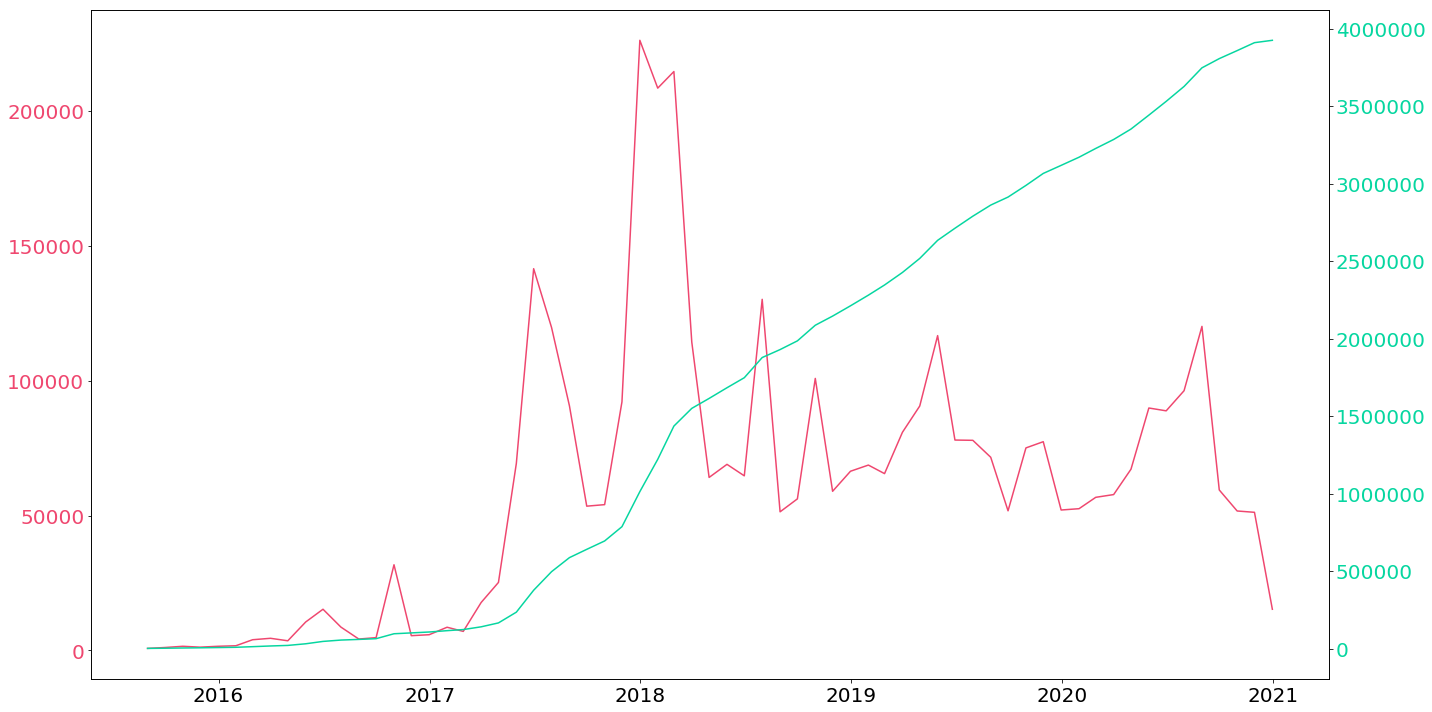

In [11]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = '#ef476f'
#ax1.set_xlabel('date')
#ax1.set_ylabel('New contracts', color=color)
ax1.plot(agg['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#06d6a0'
#ax2.set_ylabel('Total contracts', color=color)  # we already handled the x-label with ax1
ax2.plot(cums, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize=20)

fig.tight_layout() 

plt.savefig('contracts_over_time.png', transparent=True)

In [20]:
df_t = pd.read_csv("./data/transactions_over_time_2020-12-09.csv")

In [21]:
df_t['date'] = pd.to_datetime(df_t.timestamp)
agg_t = df_t.resample('M', on='date').sum()
cums_t = agg_t['count'].cumsum()

In [37]:
cums_t

date
2015-08-31 00:00:00+00:00        85609
2015-09-30 00:00:00+00:00       259414
2015-10-31 00:00:00+00:00       464459
2015-11-30 00:00:00+00:00       699192
2015-12-31 00:00:00+00:00      1046284
2016-01-31 00:00:00+00:00      1451100
2016-02-29 00:00:00+00:00      1971140
2016-03-31 00:00:00+00:00      2888310
2016-04-30 00:00:00+00:00      3911406
2016-05-31 00:00:00+00:00      5258202
2016-06-30 00:00:00+00:00      6609738
2016-07-31 00:00:00+00:00      7966645
2016-08-31 00:00:00+00:00      9372388
2016-09-30 00:00:00+00:00     10759800
2016-10-31 00:00:00+00:00     12089647
2016-11-30 00:00:00+00:00     13391233
2016-12-31 00:00:00+00:00     14707364
2017-01-31 00:00:00+00:00     16117028
2017-02-28 00:00:00+00:00     17527076
2017-03-31 00:00:00+00:00     19953547
2017-04-30 00:00:00+00:00     22493513
2017-05-31 00:00:00+00:00     26739029
2017-06-30 00:00:00+00:00     33983686
2017-07-31 00:00:00+00:00     41819561
2017-08-31 00:00:00+00:00     52342739
2017-09-30 00:00:00+

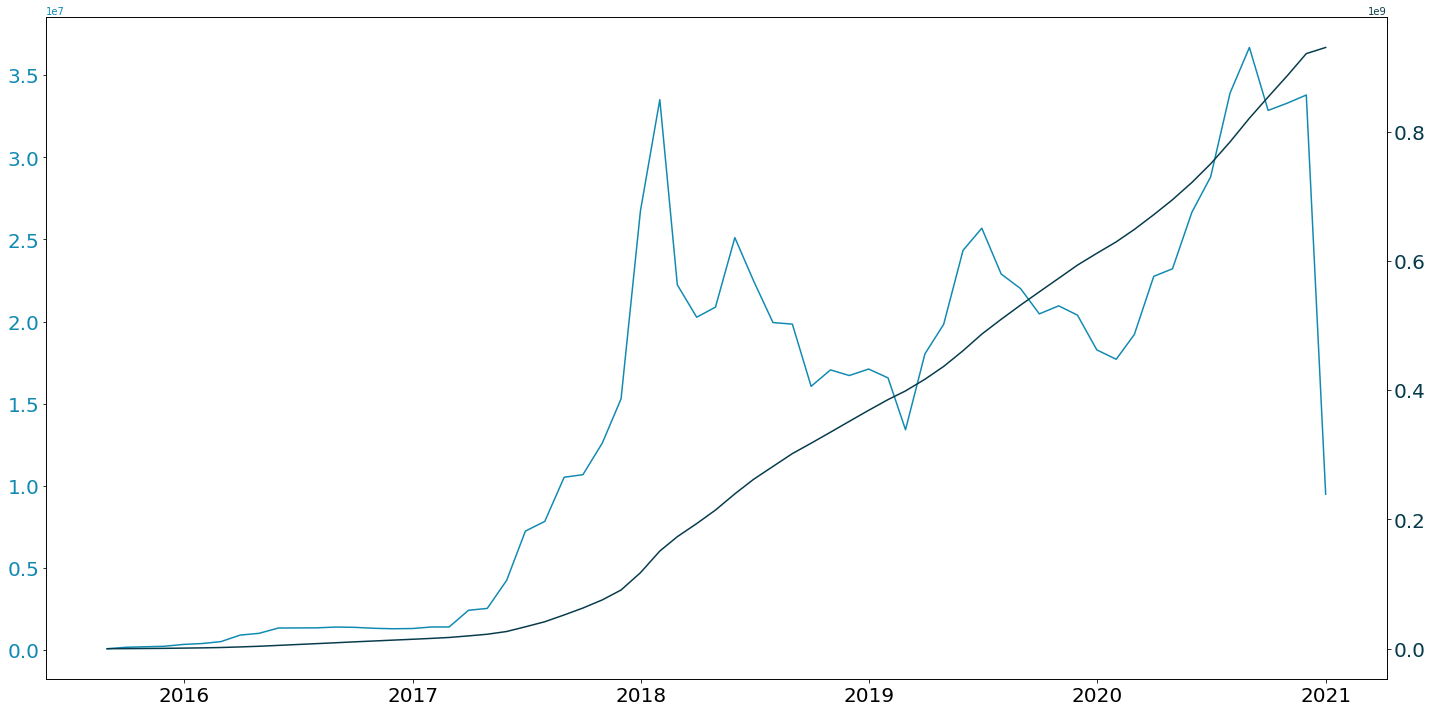

In [24]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = '#118ab2'
ax1.plot(agg_t['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = ax1.twinx()
color = '#073b4c'
ax2.plot(cums_t, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.yticks(fontsize=20)

fig.tight_layout() 

plt.savefig('contracts_over_time_with_t.png', transparent=True)